## Welcome back to Python Notebooks!
LangGraph!

In [11]:
!pip install langchain_openai

  Using cached tiktoken-0.9.0-cp312-cp312-win_amd64.whl.metadata (6.8 kB)
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached jiter-0.10.0-cp312-cp312-win_amd64.whl.metadata (5.3 kB)
  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
   ---------------------------------------- 0.0/753.3 kB ? eta -:--:--
   --------------------------------------- 753.3/753.3 kB 15.8 MB/s eta 0:00:00
Using cached tiktoken-0.9.0-cp312-cp312-win_amd64.whl (894 kB)
Using cached distro-1.9.0-py3-none-any.whl (20 kB)
Using cached jiter-0.10.0-cp312-cp312-win_amd64.whl (206 kB)
Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl (273 kB)


In [12]:
from typing import Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from pydantic import BaseModel
import random


In [13]:
# Some useful constants

nouns = ["Cabbages", "Unicorns", "Toasters", "Penguins", "Bananas", "Zombies", "Rainbows", "Eels", "Pickles", "Muffins"]
adjectives = ["outrageous", "smelly", "pedantic", "existential", "moody", "sparkly", "untrustworthy", "sarcastic", "squishy", "haunted"]

In [15]:
# Our favorite first step! Crew was doing this for us, by the way.
load_dotenv(override=True)


True

In [16]:
def shout(text: Annotated[str, "something to be shouted"]) -> str:
    print(text.upper())
    return text.upper()

shout("hello")

HELLO


'HELLO'

### A word about "Annotated"

You probably know this; type hinting is a feature in Python that lets you specify the type of something:

`my_favorite_things: List`

But you may not know this:

You can also use something called "Annotated" to add extra information that somebody else might find useful:

`my_favorite_things: Annotated[List, "these are a few of mine"]`

LangGraph needs us to use this feature when we define our State object.

It wants us to tell , what function it should call to update the State with a new value.

This function is called a **reducer**.

LangGraph provides a default reducer called `add_messages` which takes care of the most common case.

And that hopefully explains why the State looks like this.




### Step 1: Define the State object

You can use any python object; but it's most common to use a TypedDict or a Pydantic BaseModel.

In [17]:

class State(BaseModel):
        
    messages: Annotated[list, add_messages]


### Step 2: Start the Graph Builder with this State class

In [18]:
graph_builder = StateGraph(State)

### Step 3: Create a Node

A node can be any python function.

The reducer that we set before gets automatically called to combine this response with previous responses


In [19]:
def our_first_node(old_state: State) -> State:

    reply = f"{random.choice(nouns)} are {random.choice(adjectives)}"
    messages = [{"role": "assistant", "content": reply}]

    new_state = State(messages=messages)

    return new_state

graph_builder.add_node("first_node", our_first_node)

### Step 4: Create Edges

In [20]:
graph_builder.add_edge(START, "first_node")
graph_builder.add_edge("first_node", END)

### Step 5: Compile the Graph

In [21]:
graph = graph_builder.compile()

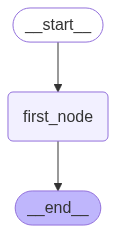

In [22]:
display(Image(graph.get_graph().draw_mermaid_png()))

### That's it! Showtime!

In [ ]:
def chat(user_input: str, history):
    message = {"role": "user", "content": user_input}
    messages = [message]
    state = State(messages=messages)
    result = graph.invoke(state)
    print(result)
    return result["messages"][-1].content


gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='de08e9fe-1a64-4266-8ab8-82f09692a43f'), AIMessage(content='Rainbows are smelly', additional_kwargs={}, response_metadata={}, id='f895f91e-c5dd-4437-871d-9d312345e9d7')]}
{'messages': [HumanMessage(content='how', additional_kwargs={}, response_metadata={}, id='8f1e6f13-81e2-4aeb-9724-5b8f2acf1de5'), AIMessage(content='Zombies are pedantic', additional_kwargs={}, response_metadata={}, id='36d83ee0-8cb7-4099-8676-5cfb27af4870')]}
{'messages': [HumanMessage(content='me', additional_kwargs={}, response_metadata={}, id='c950f68b-67e0-4c25-a3e1-3e7ee9746972'), AIMessage(content='Unicorns are existential', additional_kwargs={}, response_metadata={}, id='2335595a-0fe8-44b4-bee1-7d109f297578')]}
{'messages': [HumanMessage(content='you', additional_kwargs={}, response_metadata={}, id='f610e9ff-43de-4185-8547-17d3ee094e35'), AIMessage(content='Cabbages are haunted', additional_kwargs={}, response_metadata={}, 

### But why did I show you that?

To make the point that LangGraph is all about python functions - it doesn't need to involve LLMs!!

Now we'll do the 5 steps again, but in 1 shot:

In [24]:
# Step 1: Define the State object
class State(BaseModel):
    messages: Annotated[list, add_messages]


Step 1 in LangGraph: Define the State object

-In LangGraph, the State object represents the data that flows through your graph.

-It's usually a class (often a Pydantic BaseModel) that defines the structure of your state.

-Each field in the State can be annotated to specify how it should be updated.
 
 For example, here we use Annotated with add_messages to tell LangGraph how to handle the 'messages' list.

'''class State(BaseModel):
    messages: Annotated[list, add_messages]'''

This tells LangGraph:
 - The state will have a 'messages' field (a list).
 - When nodes return new messages, LangGraph will use the add_messages reducer to combine them.

In [25]:
# Step 2: Start the Graph Builder with this State class
graph_builder = StateGraph(State)


Step 2: Start the Graph Builder with this State class

In this step, you initialize a `StateGraph` using your `State` class. This sets up the structure for your LangGraph workflow, telling it what kind of data (state) will flow through the graph.

In simple terms, a "graph builder" is like a tool that helps you draw a flowchart for your program.

You use it to set up the steps (nodes) and how they connect (edges), so your program knows what to do next at each step.

It's like planning a route on a map: you decide where to start, what stops to make, and where to finish.


In [26]:
# Step 3: Create a Node

llm = ChatOpenAI(model="gpt-4o-mini")

def chatbot_node(old_state: State) -> State:
    response = llm.invoke(old_state.messages)
    new_state = State(messages=[response])
    return new_state

graph_builder.add_node("chatbot", chatbot_node)

Step 3: Create a Node

In simple terms, a "node" is just a step in your workflow—a function that does something with your data.

Think of it like a station on a train route: at each station (node), something happens to your package (data) before it moves to the next station.

Example:

Suppose you want your chatbot to reply to a user's message. You create a node (function) that takes the user's message, sends it to the language model, and gets a response.


In [27]:
# Step 4: Create Edges
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In simple terms, "edges" are like arrows that show how you move from one step (node) to another in your workflow.

Imagine you have a flowchart:
- You start at the "Start" point.
- You go to the "chatbot" step.
- Then you finish at the "End" point.

Edges connect these steps, telling your program what order to follow.


________________________________
Think of it like connecting the dots in a flowchart:  
- You draw a line from the **start** to your first step (node).
- Then, you draw a line from that step to the **end**.

**Example:**  
If you want your chatbot to run as soon as the workflow starts and then finish, you connect it like this:

- From `START` to `"chatbot"`
- From `"chatbot"` to `END`

This tells LangGraph the order in which to run your steps.

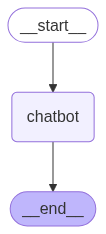

In [28]:
# Step 5: Compile the Graph
graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

What does "compile the graph" mean?**

Think of all the steps you set up (nodes and edges) as a rough sketch of your workflow.  
When you "compile" the graph, you tell LangGraph to put everything together and get it ready to run.

It's like finishing your flowchart and pressing a button to make it work as an actual program.

In simple terms:**  
- You built the plan (the graph).
- Now you "compile" it so the computer knows exactly what to do, step by step.

After compiling, you can use your graph to process messages and run your chatbot!

### That's it! And, let's do this:

In [32]:
def chat(user_input: str, history):
    initial_state = State(messages=[{"role": "user", "content": user_input}])
    result = graph.invoke(initial_state)
    print(result)
    return result['messages'][-1].content


gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='bc2bc3f0-6bb0-400d-8227-7883a6700e24'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BnJQfHzt00jlFzPnoR9VDXo5cN2Xu', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--a2f43ebb-c385-4f8e-b9f3-55ee482c81aa-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}
{'messages': [HumanMessage(content='me 

here ,is understading its  not able to remerber the history ,ant chat context 